In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mataura pf
moron mn
sao filipe cv
jamestown sh
dikson ru
luderitz na
bluff nz
khormuj ir
rikitea pf
york us
butaritari ki
iqaluit ca
aizpute lv
punta arenas cl
pathein mm
kalmunai lk
saint-augustin ca
togur ru
bahia honda cu
aflu dz
sungai besar my
port elizabeth za
asau tv
harper lr
vaini to
harper lr
port macquarie au
cumaribo co
hobart au
trairi br
samusu ws
lebu cl
lujan ar
saint-philippe re
fort nelson ca
aflu dz
dumai id
byron bay au
jamestown sh
taolanaro mg
punta arenas cl
seoul kr
khatanga ru
tuktoyaktuk ca
kaitangata nz
hobart au
georgetown sh
oranjemund na
ilulissat gl
neiafu to
rikitea pf
castro cl
jamestown sh
flagstaff us
thompson ca
umm lajj sa
bredasdorp za
katsuura jp
saskylakh ru
san cristobal ec
lorengau pg
punta arenas cl
khatanga ru
hobart au
saint-philippe re
castlemaine au
tasiilaq gl
yellowknife ca
ushuaia ar
saldanha za
klaksvik fo
cabinda ao
sao jose da coroa grande br
tuatapere nz
marawi sd
hithadhoo mv
mataura pf
tateyama jp
puerto ayora ec
sinnamary gf
coih

cape town za
kaitangata nz
goderich sl
touros br
saint-philippe re
cidreira br
maumere id
new norfolk au
santa marta co
hasaki jp
taonan cn
cruzeiro do sul br
tuktoyaktuk ca
bluff nz
castro cl
souillac mu
tiksi ru
iqaluit ca
avarua ck
kholodnyy ru
rikitea pf
rapid valley us
busselton au
chokurdakh ru
rikitea pf
albany au
busselton au
mbale ug
castro cl
trelew ar
ipixuna br
cape town za
roald no
busselton au
hilo us
avarua ck
rikitea pf
arraial do cabo br
norman wells ca
hadejia ng
bethel us
comodoro rivadavia ar
new norfolk au
aklavik ca
bredasdorp za
klaksvik fo
doha kw
seoul kr
belushya guba ru
mataura pf
provideniya ru
port hardy ca
port alfred za
puerto colombia co
severo-kurilsk ru
butembo cd
talavera de la reina es
venustiano carranza mx
coahuayana mx
punta arenas cl
barrow us
hilo us
ponta do sol cv
klaksvik fo
barrow us
bowen au
klaksvik fo
macapa br
rikitea pf
brae gb
chapais ca
mandalgovi mn
bluff nz
dekar bw
ziro in
yellowknife ca
mayo ca
rungata ki
kodiak us
vychegodskiy ru

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [8]:
import requests
from config import weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
 
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
       
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d45e75021a47a14255aae7436ea92d35
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | moron
Processing Record 3 of Set 1 | sao filipe
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | khormuj
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | york
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | aizpute
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | pathein
Processing Record 16 of Set 1 | kalmunai
Processing Record 17 of Set 1 | saint-augustin
Processing Record 18 of Set 1 | togur
Processing Record 19 of Set 1 | bahia honda
Processing Record 20 of Set 1 | aflu
City no

Processing Record 39 of Set 4 | vila franca do campo
Processing Record 40 of Set 4 | gunjur
Processing Record 41 of Set 4 | djibo
Processing Record 42 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 4 | enid
Processing Record 44 of Set 4 | bougouni
Processing Record 45 of Set 4 | merauke
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | robe
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | zyryanka
Processing Record 50 of Set 4 | leshukonskoye
Processing Record 1 of Set 5 | umm kaddadah
Processing Record 2 of Set 5 | manadhoo
Processing Record 3 of Set 5 | puerto madryn
Processing Record 4 of Set 5 | alegre
Processing Record 5 of Set 5 | tucumcari
Processing Record 6 of Set 5 | rungata
City not found. Skipping...
Processing Record 7 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 5 | obidos
Processing Record 9 of Set 5 | entebbe
Processing Record 10 of Set 5 | platanos
Processing Re

Processing Record 28 of Set 8 | nouadhibou
Processing Record 29 of Set 8 | gampaha
Processing Record 30 of Set 8 | grafton
Processing Record 31 of Set 8 | tieli
Processing Record 32 of Set 8 | berlevag
Processing Record 33 of Set 8 | stonewall
Processing Record 34 of Set 8 | sobolevo
Processing Record 35 of Set 8 | nabire
Processing Record 36 of Set 8 | karaton
Processing Record 37 of Set 8 | flinders
Processing Record 38 of Set 8 | grivenskaya
Processing Record 39 of Set 8 | vestmanna
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | tulle
Processing Record 42 of Set 8 | alyangula
Processing Record 43 of Set 8 | te anau
Processing Record 44 of Set 8 | meadow lake
Processing Record 45 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 8 | ramnagar
Processing Record 47 of Set 8 | outjo
Processing Record 48 of Set 8 | kokopo
Processing Record 49 of Set 8 | makakilo city
Processing Record 50 of Set 8 | sorland
Processin

Processing Record 14 of Set 12 | gouyave
Processing Record 15 of Set 12 | vostok
Processing Record 16 of Set 12 | camacha
Processing Record 17 of Set 12 | kruisfontein
Processing Record 18 of Set 12 | alugan
Processing Record 19 of Set 12 | salinopolis
Processing Record 20 of Set 12 | north royalton
Processing Record 21 of Set 12 | mahaicony
City not found. Skipping...
Processing Record 22 of Set 12 | nara
Processing Record 23 of Set 12 | pandamatenga
Processing Record 24 of Set 12 | petropavl
Processing Record 25 of Set 12 | halalo
City not found. Skipping...
Processing Record 26 of Set 12 | takoradi
Processing Record 27 of Set 12 | pitimbu
Processing Record 28 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 29 of Set 12 | taft
Processing Record 30 of Set 12 | dagana
Processing Record 31 of Set 12 | kizner
Processing Record 32 of Set 12 | ravar
Processing Record 33 of Set 12 | kushmurun
Processing Record 34 of Set 12 | auki
Processing Record 35 of Set 12 | kimi
City

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,64.00,78,85,3.00,NZ,2021-01-22 04:00:23
1,Moron,-34.6534,-58.6198,80.01,58,0,7.00,AR,2021-01-22 04:00:23
2,Sao Filipe,14.8961,-24.4956,72.30,73,100,6.06,CV,2021-01-22 04:00:24
3,Jamestown,42.0970,-79.2353,34.00,69,90,20.71,US,2021-01-22 04:00:24
4,Dikson,73.5069,80.5464,-26.36,83,3,6.85,RU,2021-01-22 04:00:24
5,Luderitz,-26.6481,15.1594,68.05,72,16,10.11,NA,2021-01-22 04:00:24
6,Bluff,-46.6000,168.3333,64.00,78,84,3.00,NZ,2021-01-22 04:00:25
7,Rikitea,-23.1203,-134.9692,79.09,71,1,15.55,PF,2021-01-22 04:00:25
8,York,40.1254,-77.0000,39.20,52,1,4.61,US,2021-01-22 04:00:09
9,Butaritari,3.0707,172.7902,79.81,81,66,13.29,KI,2021-01-22 04:00:25


In [12]:
#Reorder columns
new_column_order = ["city", "country", "Date", "Lat", "Long","MaxTemp", "Humidity", "Cloudiness","windspeed"]
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,64.00,78,85,3.00,NZ,2021-01-22 04:00:23
1,Moron,-34.6534,-58.6198,80.01,58,0,7.00,AR,2021-01-22 04:00:23
2,Sao Filipe,14.8961,-24.4956,72.30,73,100,6.06,CV,2021-01-22 04:00:24
3,Jamestown,42.0970,-79.2353,34.00,69,90,20.71,US,2021-01-22 04:00:24
4,Dikson,73.5069,80.5464,-26.36,83,3,6.85,RU,2021-01-22 04:00:24
5,Luderitz,-26.6481,15.1594,68.05,72,16,10.11,NA,2021-01-22 04:00:24
6,Bluff,-46.6000,168.3333,64.00,78,84,3.00,NZ,2021-01-22 04:00:25
7,Rikitea,-23.1203,-134.9692,79.09,71,1,15.55,PF,2021-01-22 04:00:25
8,York,40.1254,-77.0000,39.20,52,1,4.61,US,2021-01-22 04:00:09
9,Butaritari,3.0707,172.7902,79.81,81,66,13.29,KI,2021-01-22 04:00:25


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

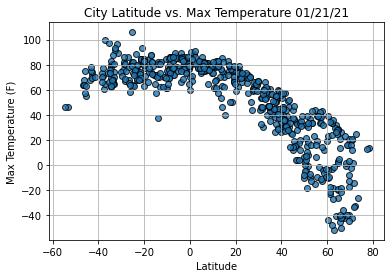

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data")

# Show plot.
plt.show()

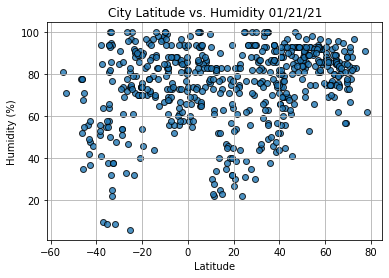

In [16]:
# 6.3.2# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data")
# Show plot.
plt.show()

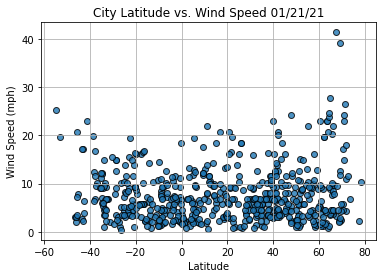

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()